In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

In [2]:
hotel = pd.read_csv('C:\\Users\jesica\Downloads\hotel_bookings.csv')
#hotel shape at the beginning is (119390, 32)
print(hotel.shape) 
hotel.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
#Problem with the date of the data. As we can see here, the date time is separated into three columns (arrival_date_year,arrival_date_month and arrival_date_day_of_month), we have to combine this three columns into 1 datetime columns :
#1. Turn the month (str) into (int) so we can convert them to date time
month_df = hotel['arrival_date_month']
hotel['month'] = pd.to_datetime(month_df,format="%B").dt.month

#combine the datetime 
dict_date= {'day': hotel['arrival_date_day_of_month'],
            'month': hotel['month'],
            'year':hotel['arrival_date_year']} 

hotel['arrival_date']=pd.to_datetime(dict_date)
print(hotel.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month',
       'arrival_date'],
      dtype='object')


In [4]:
#detect whether there are null data or not#
hotel_null = hotel.isna().sum()
#drop the null value and checking whether the null value is really dropped. 
hotel = hotel.dropna()

#detect whether there are duplicated value and drop them 
print(hotel.duplicated().sum())
hotel=hotel.drop_duplicates()
print(hotel.shape)

#examine the data type
print(hotel.dtypes)
#change the data type 
hotel['children']=hotel['children'].astype('int64')
hotel['agent']=hotel['agent'].astype('object')
hotel['company']=hotel['company'].astype('object')

#re-examine the data type 


28
(189, 34)
hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigne

In [5]:
#drop the combined columns and unecessary column (reservation_status and is_canceled have the same meaning) 
hotel = hotel.drop(columns=['arrival_date_year','arrival_date_day_of_month','arrival_date_month','month'])
print(hotel.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')


   week  counts
0    45      57
1    46      50
2    33       9
3    19       7
4    21       6


Text(46, 55, 'week 45 is the busiest week')

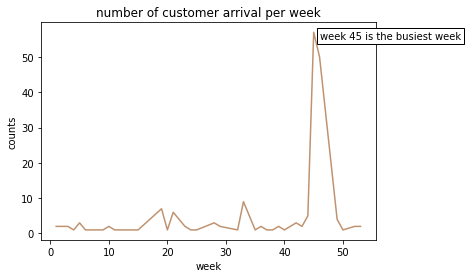

In [34]:
#filter the data that we want to use 
week_res = hotel['arrival_date_week_number'].value_counts().rename_axis('week').reset_index(name='counts')
print(week_res.head())
sns.lineplot(x=week_res['week'],y=week_res['counts'],color='#BF9270')
plt.title('number of customer arrival per week')
t= ("week 45 is " 
    "the busiest week")
plt.text(46,55,t,fontsize=10,ha='left',wrap=True,bbox=dict(boxstyle="square,pad=0.3",fc="white"))

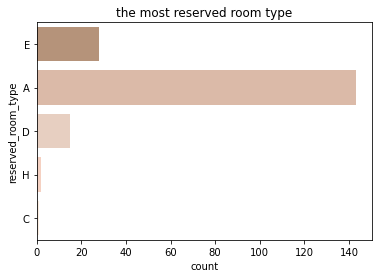

In [31]:
pal= {'E':'#BF9270','A':'#E3B7A0','D':'#EDCDBB','H':'#FDCEB9','C':'#FFEDDB'}
sns.countplot(y=hotel['reserved_room_type'],palette=pal)
plt.title('the most reserved room type')
plt.show()

In [37]:
canceled = hotel.loc[hotel['is_canceled']== 1,'arrival_date_week_number'].value_counts().rename_axis('week').reset_index(name='num_canceled')
print(canceled)

   week  num_canceled
0    46            10
1    33             1
2     3             1
3    20             1
4    25             1
5    45             1
6    15             1


In [47]:
hotel.loc[hotel['reserved_room_type']==hotel['assigned_room_type'],'is_aligned'] = True
hotel.loc[hotel['reserved_room_type']!=hotel['assigned_room_type'],'is_aligned'] = False
hotel.loc[hotel['is_aligned']==False,'arrival_date_week_number'].value_counts(normalize=True)

46    0.411765
33    0.078431
44    0.078431
45    0.078431
21    0.058824
3     0.039216
5     0.039216
42    0.039216
49    0.039216
52    0.039216
1     0.019608
15    0.019608
19    0.019608
28    0.019608
39    0.019608
Name: arrival_date_week_number, dtype: float64

In [49]:
hotel.loc[hotel['arrival_date_week_number']== 46,'reserved_room_type'].value_counts()

A    41
E     9
Name: reserved_room_type, dtype: int64

In [50]:
hotel.loc[hotel['arrival_date_week_number']== 46,'assigned_room_type'].value_counts()

A    21
E    11
C     8
D     7
F     2
B     1
Name: assigned_room_type, dtype: int64